# BIFROST inelastic line resolution with open PSC

In [48]:
from KGS import *
import scipp as sc
mpl.rcParams['font.size']        = 26
mpl.rcParams['lines.markersize'] = 9

In [49]:
data = np.loadtxt('list_output_line_resolution.txt')

print(np.shape(data))

(1520, 9)


In [50]:
deltaE_bin = np.array([0, 1, 2, 3, 4, 5,6,7,8,9,10,15,20,25,30,35,40,45,50])
Ef_bin = np.array([2.7, 3.2, 3.8, 4.4, 5.0])
PSC_bin = np.array([0.1, 0.164286, 0.228571, 0.292857, 0.357143, 0.421429, 0.485714, 0.55, 0.614286, 0.678571, 0.742857, 0.807143, 0.871429, 0.935714, 1.0, 4.0])

len_Ef, len_PSC, len_deltaE = len(Ef_bin), len(PSC_bin), len(deltaE_bin)

# Create a DataFrame
df = pd.DataFrame(data)

# Sort by columns at indices 0, 1, and 2
df_sorted = df.sort_values(by=[df.columns[0], df.columns[1], df.columns[2]], ascending=[True, True, True])

# Convert back to numpy array if needed, keeping original shape (1520, 9)
sorted_array = df_sorted.to_numpy()

print(sorted_array.shape)
# Display the shape of the sorted array

#array = sorted_array[:,8].reshape(len_Ef, len_PSC, len_PSC)  # Should output (1520, 9)

data_sorted = np.reshape(data[0:1425,8], (5,15,19))



(1520, 9)


In [123]:
# open_2p7 = np.array([0.0426, 0.07485, 0.1093, 0.1487, 0.1913, 0.2374, 0.2864, 0.3357, 0.3925, 0.44336, 0.5114, 0.8361, 1.2104, 1.6532, 2.0744, 2.6002, 3.1150, 3.5026, 4.3008])
# open_3p2 = np.array([0.0658, 0.09717, 0.1338, 0.1750, 0.2166, 0.2619, 0.3197, 0.36630, 0.4250, 0.4836, 0.5323, 0.8612, 1.2855, 1.6903, 2.1247, 2.5926, 3.3760, 3.6487, 4.5506])
# open_3p8 = np.array([0.09003, 0.1239, 0.1626, 0.2054, 0.2518, 0.2975, 0.34820, 0.3998, 0.4598, 0.52422, 0.580673, 0.93977, 1.3156, 1.7312, 2.1111, 2.6885, 3.3045, 3.5228, 4.3183])
# open_4p4 = np.array([0.1036, 0.1478, 0.1913, 0.2332, 0.2820, 0.3333, 0.38346, 0.4444, 0.4929, 0.5565, 0.61938, 0.9732, 1.3975, 1.7500, 2.2507, 2.6894, 3.3263, 3.9407, 4.585848])
# open_5p0 = np.array([0.0859, 0.1580, 0.2130, 0.26145, 0.3140, 0.3707, 0.4254, 0.4803, 0.5454, 0.6059, 0.6702259, 1.04544, 1.47428, 1.8287, 2.3577, 2.8424, 3.3615, 4.1392, 4.4714])

open_2p7 = np.array([0.05047229, 0.08469376, 0.11187455, 0.15200751, 0.19572513, 0.24267521,
  0.29256789, 0.34270092, 0.40039887, 0.45184591, 0.52239177, 0.85094357,
  1.2316407 , 1.68187558, 2.11020194, 2.64529505, 3.16803103, 3.5626935 ,
  4.3720732 ])
open_3p2 = np.array([0.07369018, 0.10142161, 0.13620131, 0.17806856, 0.22077108, 0.26677391,
  0.32558146, 0.37286876, 0.43249258, 0.4917027 , 0.54257482, 0.8750314 ,
  1.30646281, 1.71756427, 2.15943602, 2.63541525, 3.43157199, 3.70805615,
  4.62428957])
open_3p8 = np.array([0.08791794, 0.12332932, 0.16444742, 0.2078546 , 0.25552361, 0.30181161,
  0.35327043, 0.40566753, 0.46644831, 0.53149398, 0.59038301, 0.95308522,
  1.33503707, 1.75715997, 2.14363567, 2.73050499, 3.35619816, 3.5781519 ,
  4.38539661])
open_4p4 = np.array([0.11217631, 0.15068248, 0.19233766, 0.23484702, 0.28490031, 0.33688016,
  0.38767771, 0.44947118, 0.49856097, 0.56269299, 0.62817008, 0.98519071,
  1.41597205, 1.774108  , 2.28280546, 2.72877526, 3.37576562, 3.99942725,
  4.65340055])
open_5p0 = np.array([0.13098704, 0.1696116 , 0.2129287 , 0.26190704, 0.31584975, 0.37316798,
  0.42866973, 0.48423932, 0.55000524, 0.61107396, 0.67810849, 1.05631656,
  1.49162395, 1.85159058, 2.38896181, 2.88149484, 3.40863962, 4.19766818,
  4.5343677])


(5, 16, 19)


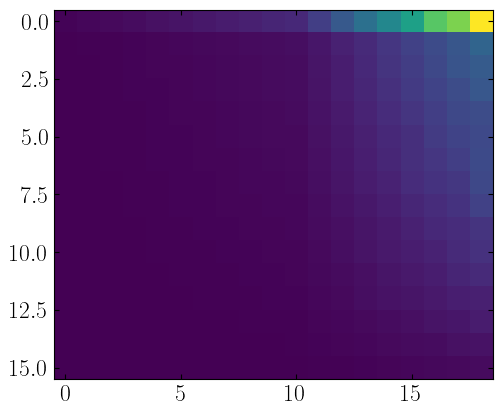

In [124]:
data_2p7 = np.vstack((data_sorted[0], open_2p7))
data_3p2 = np.vstack((data_sorted[1], open_3p2))
data_3p8 = np.vstack((data_sorted[2], open_3p8))
data_4p4 = np.vstack((data_sorted[3], open_4p4))
data_5p0 = np.vstack((data_sorted[4], open_5p0))

plt.imshow(np.flipud(data_3p2))

data_FWHM = np.array([data_2p7, data_3p2, data_3p8, data_4p4, data_5p0])
print(data_FWHM.shape)

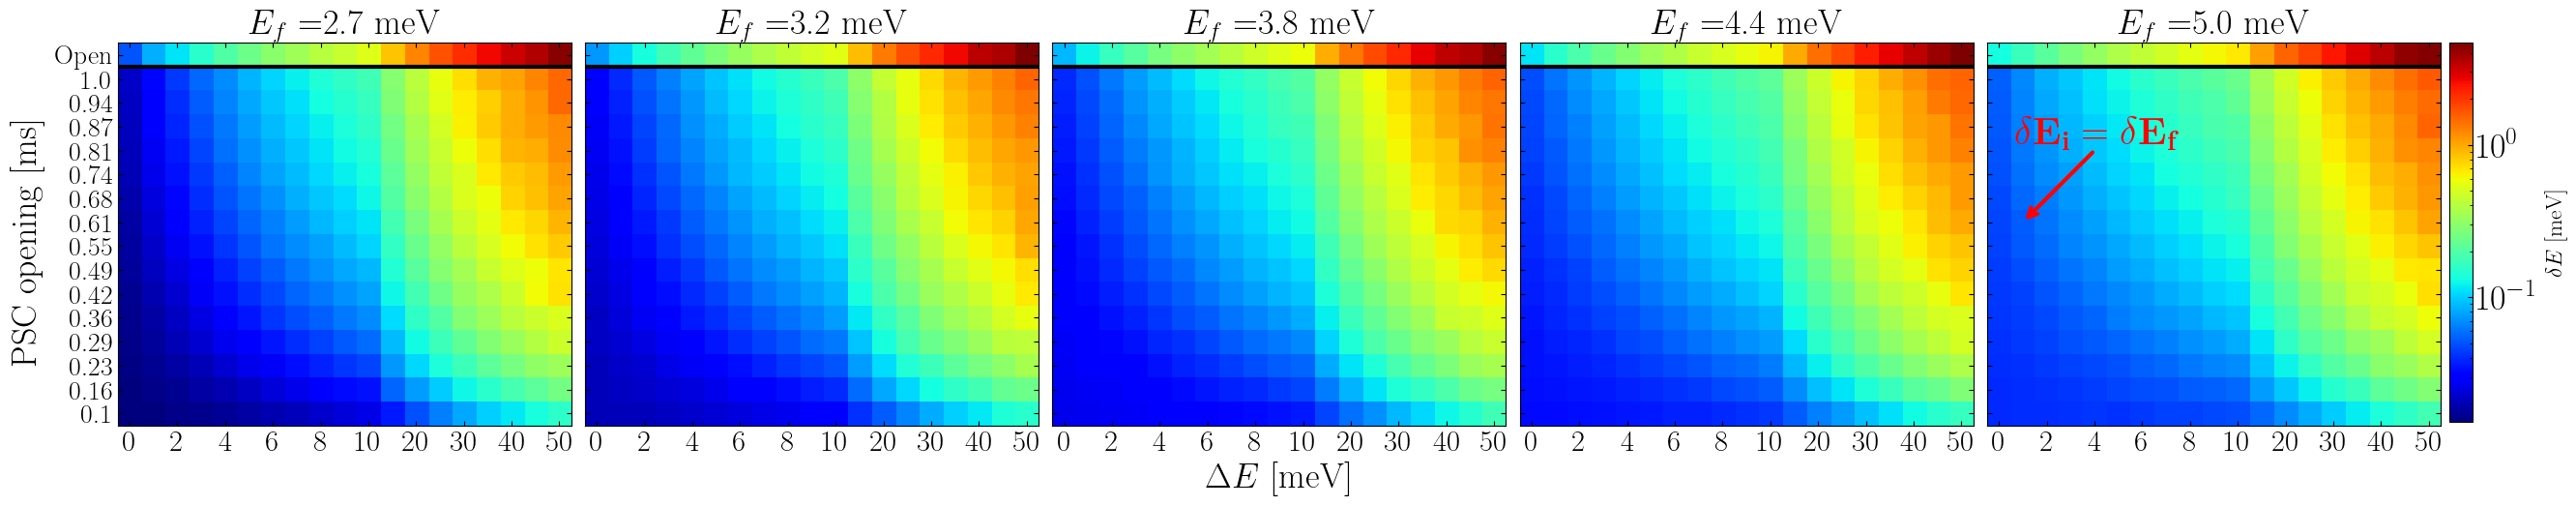

In [125]:
n = 5
max_width = 5 ##images per row
height, width = n//max_width +1, max_width

deltaE_labels = np.array([0,2,4,6,8,10,20,30,40,50])
PSC_labels = np.array([0.1, 0.16, 0.23, 0.29, 0.36, 0.42, 0.49, 0.55, 0.61, 0.68, 0.74, 0.81, 0.87, 0.94, 1.0, 'Open'])

fig, axs = plt.subplots(height, width, figsize=(31,16), sharey=True)
fig.subplots_adjust(wspace=0.03)
max_E = np.max(data_FWHM)
min_E = np.min(data_FWHM)

for i in range(len(Ef_bin)):
    #ax.set_ylabel('PSC opening [ms]')
    ax = axs.flat[i]
    im = ax.imshow(np.flipud(data_FWHM[i]), norm=colors.LogNorm(vmin=min_E, vmax=max_E), cmap='jet') # norm=colors.LogNorm(vmin=min_E, vmax=max_E)
    #ax.legend(loc="upper right")
    if i == 2:
        ax.set_xlabel('$\Delta E$ [meV]', fontsize=26)
    ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
    ax.set_yticklabels(np.flip(PSC_labels ,axis=0), fontsize=20)
    #ax.plot(DeltaE_crossings[i]-0.5, np.flipud(PSC_idx)+1.5, '-', color='white', linewidth=5, alpha=0.7)
    ax.set_title('$E_f$ ='+str(Ef_bin[i])+' meV', fontsize = 26)
    ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
    ax.set_xlim(-0.5,18.5)
    ax.set_xticklabels(deltaE_labels, fontsize=22)
    ax.plot(np.array([-0.5,19]), np.array([0.5,0.5]), color='k', linewidth=3)
cax = ax.inset_axes([1.02, 0.01, 0.05, 0.99])
cbar=fig.colorbar(im, label=r'$\delta E$ [meV]', ax=axs[1, 2], cax=cax)
cbar.ax.tick_params(labelsize=26)
fig.text(0.089, 0.7, 'PSC opening [ms]', va='center', rotation='vertical', fontsize=26)
fig.text(0.785, 0.77, r'$\mathbf{\delta E_i = \delta E_f}$', color='red', ha='center', va='center', fontsize=29)
ax.annotate(
    text='',
    xy=(1, 7),    # starting point of the arrow
    xytext=(4, 4),  # ending point of the arrow
    arrowprops=dict(arrowstyle='->', color='red', linewidth=3),
)

## access each axes object via axs.flat
for ax in axs.flat:
    ## check if something was plotted 
    if not bool(ax.has_data()):
        fig.delaxes(ax) ## delete if nothing is plotted in the axes obj

#fig.savefig('Inelastic_Energy_resolution_Article_limits.svg', format='svg', bbox_inches='tight', dpi=300)

## Calculating the approximate method resolution

In [126]:
# Determine sigma Ef
detectors = np.array(['2p7', '3p2', '3p8', '4p4', '5p0'])

def read_Emon(detector):
    """
    This function loads the Emon data that is found on the detector and it 
    creates a set of meta data that tells you what Delta E, Ef and PSC setting the data is from.
    """
    filename = './../SD_Ef_res_sim1/emon_det_'+detector+'_mid_res.dat'
    
    E_bins = np.genfromtxt(filename)
    
    mu = np.average(E_bins[:,0], weights=E_bins[:,1])
    sigma = np.sqrt(np.average((E_bins[:,0]-mu)**2, weights=E_bins[:,1]))
        
    detector = detector.replace('p', '.')
    detector = np.asarray(detector, dtype=float)
        
    meta_data = np.array([detector, mu, sigma])
        
    return meta_data

Ef_mon_sigma = []

for k in range(len(detectors)):
    data = read_Emon(detectors[k])
    Ef_mon_sigma.append(data[2])

Ef_mon_sigma = np.asarray(Ef_mon_sigma)
print(Ef_mon_sigma)

[0.00635782 0.00846869 0.01115466 0.01368919 0.01609841]


In [127]:
# Determine sigma Ei

def read_PSC_t(Etrans, PSC):
    filename = './../SD_Cluster_v11/'+'v11_Ei_'+str(Etrans)+'/'+str(PSC)+'/ToFAfterPSC2.dat'
    
    t_bins = np.genfromtxt(filename)
    
    mu = np.average(t_bins[:,0], weights=t_bins[:,1])
    sigma = np.sqrt(np.average((t_bins[:,0]-mu)**2, weights=t_bins[:,1]))
        
    meta_data = np.array([Etrans, PSC, mu, sigma])
    
    return meta_data


def sigma_Ei(DeltaE, Ef, PSC):
    
    read = read_PSC_t(DeltaE,PSC)
    

    Ei = (DeltaE + Ef)#*1.602176634e-22 # [J]
    sigma_PSCt = read[3]*1e-6 # [s]
    m_n = 1.67492749804e-27 # [kg]
    L1 = (162-6.35) # [m]
    
    sigma_Ei = (874.8*np.power(Ei,3/2)*sigma_PSCt)/(L1)#*6.24150907e21 # convert from J to meV # convert from J to meV
    
    return sigma_Ei


print(sigma_Ei(0,2.7,0))

0.0008230079862189586


In [128]:
# Determine sigma Ei Open chopper

def read_PSC_t_open(Etrans,PSC):
    filename = './../SD_Cluster_v11/'+'v11_open_t_offset_'+str(Etrans)+'/moderator_off_set.dat'
    
    t_bins = np.genfromtxt(filename)
    
    mu = np.average(t_bins[:,0], weights=t_bins[:,1])
    sigma = np.sqrt(np.average((t_bins[:,0]-mu)**2, weights=t_bins[:,1]))
        
    meta_data = np.array([Etrans, PSC, mu, sigma])
    
    return meta_data


def sigma_Ei_open(DeltaE, Ef, PSC):
    
    read = read_PSC_t_open(DeltaE,PSC)
    

    Ei = (DeltaE + Ef)#*1.602176634e-22 # [J]
    sigma_PSCt = 849.933*1e-6#read[3]*1e-6 # [s]
    m_n = 1.67492749804e-27 # [kg]
    L1 = (162-0.3) # [m]6.35
    
    sigma_Ei = (874.8*np.power(Ei,3/2)*sigma_PSCt)/(L1)#*6.24150907e21 # convert from J to meV # convert from J to meV
    
    return sigma_Ei

def sigma_DeltaE(sigma_Ei, sigma_Ef):
    return np.sqrt(sigma_Ei**2+sigma_Ef**2)*2.35


DeltaE = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50])


res_2p7_4p0 = []
sigma_2p7_4p0 = sigma_Ei_open(DeltaE[0],2.7,15)



In [129]:
#Calculating sigma Delta E


#print(sigma_DeltaE(sigma_Ei(10,5,14), Ef_mon_sigma[4]))

res_5_1p0 = []
res_5_0p1 = []
res_2p7_1p0 = []
res_2p7_0p1 = []
res_5_4p0 = []
res_2p7_4p0 = []


for h in range(0,19):
    sigma_5_1p0 = sigma_DeltaE(sigma_Ei(DeltaE[h],5,14), Ef_mon_sigma[4])
    res_5_1p0.append(sigma_5_1p0)
    
    sigma_5_0p1 = sigma_DeltaE(sigma_Ei(DeltaE[h],5,0), Ef_mon_sigma[4])
    res_5_0p1.append(sigma_5_0p1)
    
    sigma_2p7_1p0 = sigma_DeltaE(sigma_Ei(DeltaE[h],2.7,14), Ef_mon_sigma[0])
    res_2p7_1p0.append(sigma_2p7_1p0)
    
    sigma_2p7_0p1 = sigma_DeltaE(sigma_Ei(DeltaE[h],2.7,0), Ef_mon_sigma[0])
    res_2p7_0p1.append(sigma_2p7_0p1)

    sigma_5_4p0 = sigma_DeltaE(sigma_Ei_open(DeltaE[h],5,15), Ef_mon_sigma[4])
    res_5_4p0.append(sigma_5_4p0)
    
    sigma_2p7_4p0 = sigma_DeltaE(sigma_Ei_open(DeltaE[h],2.7,15), Ef_mon_sigma[0])
    res_2p7_4p0.append(sigma_2p7_4p0)
    
sigma_5_1p0 = np.asarray(res_5_1p0)
sigma_5_0p1 = np.asarray(res_5_0p1)
sigma_2p7_1p0 = np.asarray(res_2p7_1p0)
sigma_2p7_0p1 = np.asarray(res_2p7_0p1)
sigma_5_4p0 = np.asarray(res_5_4p0)
sigma_2p7_4p0 = np.asarray(res_2p7_4p0)

print(sigma_2p7_1p0)
print(sigma_2p7_4p0)

[0.02295429 0.03156498 0.04286277 0.05575536 0.07000538 0.08543324
 0.10197526 0.11954345 0.13807187 0.15751785 0.17772805 0.29097809
 0.42141644 0.56697535 0.72610006 0.89816465 1.08138062 1.27577553
 1.48068723]
[0.05021416 0.07834278 0.11111184 0.14780659 0.18799204 0.2313635
 0.27768967 0.3267859  0.37849975 0.43270225 0.48928226 0.80479647
 1.16876065 1.57539874 2.02062076 2.50133052 3.01507732 3.55985823
 4.13399615]


### Plotting

In [130]:
# The right sigma Ei anf sigma Ef curves. 

Delta_E_range = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50])
Delta_E_range_T = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50])

sigma_Ei_5_0p1 = []

for i in Delta_E_range:
    num = sigma_Ei(i,5.0,0)
    sigma_Ei_5_0p1.append(num)

sigma_Ef_5 = np.ones(len(Delta_E_range))*Ef_mon_sigma[4]

(5, 16, 19)


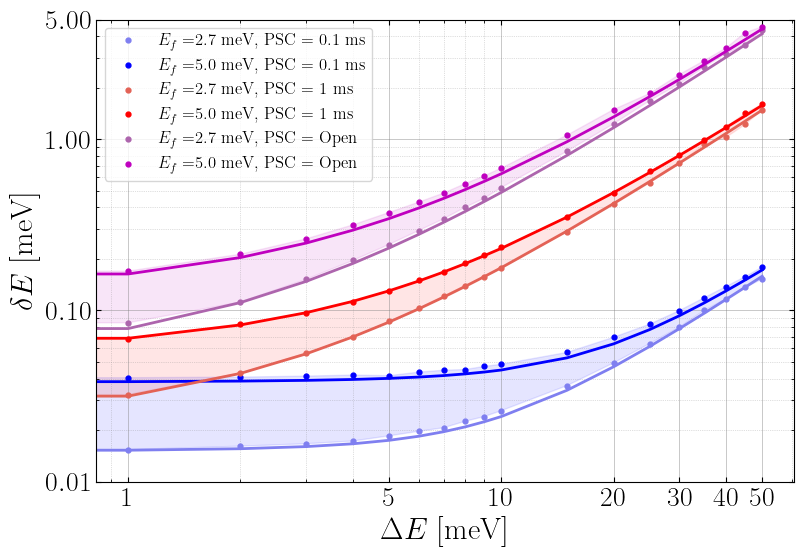

In [131]:
mpl.rcParams['font.size'] = 20
print(np.shape(data_FWHM))
from matplotlib.ticker import ScalarFormatter


fig, ax = plt.subplots(figsize=(9,6))


##### PSC = 0.1 ms
ax.plot(Delta_E_range, data_FWHM[0,0,:], '.',label='$E_f =$2.7 meV, PSC = 0.1 ms', color='#7f7ff0')
ax.plot(Delta_E_range, sigma_2p7_0p1, color='#7f7ff0')

ax.plot(Delta_E_range, data_FWHM[4,0,:], '.', label='$E_f =$5.0 meV, PSC = 0.1 ms', color='b')
ax.fill_between(Delta_E_range, data_FWHM[0,0,:], data_FWHM[4,0,:], color='b', alpha=0.1)
ax.plot(Delta_E_range, sigma_5_0p1, color='b')


##### PSC = 1.0 ms
ax.plot(Delta_E_range, data_FWHM[0,14,:], '.', label='$E_f =$2.7 meV, PSC = 1 ms', color='#e36256')
ax.plot(Delta_E_range, sigma_2p7_1p0, color='#e36256')

ax.plot(Delta_E_range, data_FWHM[4,14,:], '.', label='$E_f =$5.0 meV, PSC = 1 ms', color='r')
ax.fill_between(Delta_E_range, data_FWHM[0,14,:], data_FWHM[4,14,:], color='r', alpha=0.1)
ax.plot(Delta_E_range, sigma_5_1p0, color='r')


##### PSC = 4.0 ms
ax.plot(Delta_E_range, data_FWHM[0,15,:], '.', label='$E_f =$2.7 meV, PSC = Open', color='#ad65ad')
ax.plot(Delta_E_range, sigma_2p7_4p0, color='#ad65ad')

ax.plot(Delta_E_range, data_FWHM[4,15,:], '.', label='$E_f =$5.0 meV, PSC = Open', color='m')
ax.fill_between(Delta_E_range, data_FWHM[0,15,:], data_FWHM[4,15,:], color='m', alpha=0.1)
ax.plot(Delta_E_range, sigma_5_4p0, color='m')


ax.set_xlabel('$\Delta E$ [meV]', fontsize=22)
ax.set_ylabel('$\delta E$ [meV]', fontsize = 22)
ax.set_ylim(1e-2,5)
#ax.set_xlim(0,50)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_yticks([0.01, 0.1, 1, 5])
ax.set_xticks([1.0, 5, 10, 20, 30, 40, 50])
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.grid(which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.6)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)
ax.legend(fontsize=12)
#fig.savefig('Energy_resolution_cuts_Article_different_analyzers_loglog.png', format='png', bbox_inches='tight', dpi=300)
#fig.savefig('Energy_resolution_cuts_Article_different_analyzers_loglog.svg', format='svg', bbox_inches='tight', dpi=300)

In [132]:
#### Calculating error propagation prediction

def theo_tof(meta_data):
    # Defining all relevant parameters
    m_n = 1.67492749804e-27 # [kg] 
    E_f = meta_data[0] *1.602176634e-22
    Delta_E = meta_data[1]*1.602176634e-22 # [J]
    E_i = Delta_E+E_f # [meV]
    Li = (162-6.35) # [m]
    Lf = meta_data[6]+meta_data[7] # [m]
    #print(meta_data[1])

    # Calculating the theoritical time 
    theo_tof = np.sqrt((m_n*Li**2)/(2*E_i))+np.sqrt((m_n*Lf**2)/(2*E_f)) # [s]
    #print('theo_tof =',theo_tof)
    
    return theo_tof



def Error_prop(meta_data, sigma_Ef, PSC):
    
    # Ordering the data and defining parameters
    E_f = meta_data[0]*1.602176634e-22 # [J]
    Etrans = int(meta_data[1])
    m_n = 1.67492749804e-27 # [kg]
    Li = (162-6.35) # [m]
    Lf = meta_data[6]+meta_data[7] # [m]
    sigma_tof = meta_data[2]#*2.35 # [s]
    Delta_E = meta_data[1]
    #print(sigma_tof)

    # Calculating the theoretical t_ToF
    t_tof = theo_tof(meta_data)


    # Calculating the t_f
    t_f = np.sqrt((Lf**2*m_n)/(2*E_f))
    #print('t_f =', t_f)

    
    # Calculating the DE_tof 
    DE_tof = ((-Li**2*m_n)/(t_tof-t_f)**3)*6.24150907e21
    #print('DE_tof =',DE_tof)

    # Calculating the DE_Ef 
    DE_Ef = (-1-(Li**2*m_n*t_f)/(2*E_f*(t_tof-t_f)**3))#*6.24150907e21
    #print('DE_Ef =',DE_Ef)

    # Full theory expression
    Error_deltaE = np.sqrt((DE_tof*read_PSC_t(Etrans, PSC)[3]*1e-6)**2+(DE_Ef*sigma_Ef)**2)*2.35

    return Error_deltaE


def Error_prop_open(meta_data, sigma_Ef, PSC):
    
    # Ordering the data and defining parameters
    E_f = meta_data[0]*1.602176634e-22 # [J]
    Etrans = int(meta_data[1])
    m_n = 1.67492749804e-27 # [kg]
    Li = (162-6.35) # [m]
    Lf = meta_data[6]+meta_data[7] # [m]
    sigma_tof = meta_data[2]#*2.35 # [s]
    Delta_E = meta_data[1]
    #print(sigma_tof)

    # Calculating the theoretical t_ToF
    t_tof = theo_tof(meta_data)


    # Calculating the t_f
    t_f = np.sqrt((Lf**2*m_n)/(2*E_f))
    #print('t_f =', t_f)

    
    # Calculating the DE_tof 
    DE_tof = ((-Li**2*m_n)/(t_tof-t_f)**3)*6.24150907e21
    #print('DE_tof =',DE_tof)

    # Calculating the DE_Ef 
    DE_Ef = (-1-(Li**2*m_n*t_f)/(2*E_f*(t_tof-t_f)**3))#*6.24150907e21
    #print('DE_Ef =',DE_Ef)

    # Full theory expression
    Error_deltaE = np.sqrt((DE_tof*read_PSC_t_open(Etrans, PSC)[3]*1e-6)**2+(DE_Ef*sigma_Ef)**2)*2.35

    return Error_deltaE


In [133]:
orig_data = np.loadtxt('list_output_line_resolution.txt')

phase_space_meta=np.asarray(orig_data)


def find_phase_space_meta(ms, analyzer):
    """
    returns an array of the right indexes in the meta data given the analyzer and PSC setting.
    """
    indices = np.where((phase_space_meta[:,0] == analyzer) & (phase_space_meta[:,2] == ms*1e-3))
    return indices[0]


print(len(find_phase_space_meta(1, 5.0)))

19


In [134]:
# Calculating FWHM for the setting I need

idx_2p7_0p1 = find_phase_space_meta(0.1, 2.7)
ErrorProb_2p7_0p1ms = []

for i in idx_2p7_0p1:
    res = Error_prop(phase_space_meta[i],Ef_mon_sigma[0],0)
    #print('FWHM DeltaE =',res)
    ErrorProb_2p7_0p1ms.append(res)



idx_2p7_1 = find_phase_space_meta(1, 2.7)
ErrorProb_2p7_1ms = []

for i in idx_2p7_1:
    res = Error_prop(phase_space_meta[i],Ef_mon_sigma[0],14)
    #print('FWHM DeltaE =',res)
    ErrorProb_2p7_1ms.append(res)



idx_5p0_0p1 = find_phase_space_meta(0.1, 5.0)
ErrorProb_5p0_0p1ms = []

for i in idx_5p0_0p1:
    res = Error_prop(phase_space_meta[i],Ef_mon_sigma[4],0)
    #print('FWHM DeltaE =',res)
    ErrorProb_5p0_0p1ms.append(res)



idx_5p0_1 = find_phase_space_meta(1, 5.0)
ErrorProb_5p0_1ms = []

for i in idx_5p0_1:
    res = Error_prop(phase_space_meta[i],Ef_mon_sigma[4],14)
    #print('FWHM DeltaE =',res)
    ErrorProb_5p0_1ms.append(res)



idx_5p0_4ms = find_phase_space_meta(4, 5.0)
ErrorProb_5p0_4ms = []

for i in idx_5p0_4ms:
    res = Error_prop_open(phase_space_meta[i],Ef_mon_sigma[4],15)
    #print('FWHM DeltaE =',res)
    ErrorProb_5p0_4ms.append(res)



idx_2p7_4ms = find_phase_space_meta(4, 2.7)
ErrorProb_2p7_4ms = []

for i in idx_2p7_4ms:
    res = Error_prop_open(phase_space_meta[i],Ef_mon_sigma[0],15)
    #print('FWHM DeltaE =',res)
    ErrorProb_2p7_4ms.append(res)


print(ErrorProb_2p7_4ms)

[0.052177221565782014, 0.0813408911612473, 0.1169667802984726, 0.15641309403929976, 0.20016870383629032, 0.24601188450396688, 0.295628467961131, 0.3479391510786321, 0.40283465742805574, 0.4605457364345262, 0.5209021630205101, 0.8568459541916472, 1.2464014854102934, 1.67947243045367, 2.1540668242739867, 2.662710972922353, 3.207161212541879, 3.785318631226454, 4.38355020263457]


[  22.   32.   43.   56.   70.   86.  103.  121.  140.  158.  176.  289.
  416.  558.  723.  936. 1025. 1220. 1484.]


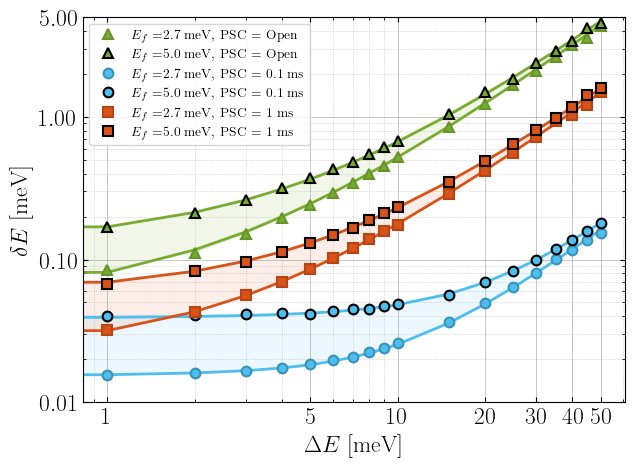

In [140]:
mpl.rcParams['font.size'] = 17
mpl.rcParams['lines.markersize'] = 7
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.direction']='in'
mpl.rcParams['ytick.direction']='in'


fig, ax = plt.subplots(figsize=(7,5))

##### PSC = 0.1 ms
# 2p7, PSC = 0.1 ms
ax.errorbar(Delta_E_range, data_FWHM[0,0,:], fmt='o', label='$E_f =$2.7 meV, PSC = 0.1 ms',
            color='#4dbeee',markeredgecolor='#3992b8', mew=1.5)  # 2p7 → use ecolor
ax.plot(Delta_E_range, ErrorProb_2p7_0p1ms, color='#4dbeee')

# 5p0, PSC = 0.1 ms
ax.errorbar(Delta_E_range, data_FWHM[4,0,:], fmt='o', label='$E_f =$5.0 meV, PSC = 0.1 ms',
            color='#4dbeee',markeredgecolor='black', mew=1.5)  # 5p0 → black ecolor
ax.fill_between(Delta_E_range, data_FWHM[0,0,:], data_FWHM[4,0,:], color='#4dbeee', alpha=0.1)
ax.plot(Delta_E_range, ErrorProb_5p0_0p1ms, color='#4dbeee')


##### PSC = 1.0 ms
# 2p7, PSC = 1.0 ms
ax.errorbar(Delta_E_range, data_FWHM[0,14,:], fmt='s', label='$E_f =$2.7 meV, PSC = 1 ms',
            color='#d95319',markeredgecolor='#b54514', mew=1.5)  # 2p7 → use ecolor
ax.plot(Delta_E_range, ErrorProb_2p7_1ms, color='#d95319')

# 5p0, PSC = 1.0 ms
ax.errorbar(Delta_E_range, data_FWHM[4,14,:], fmt='s', label='$E_f =$5.0 meV, PSC = 1 ms',
            color='#d95319',markeredgecolor='black', mew=1.5)  # 5p0 → black ecolor
ax.fill_between(Delta_E_range, data_FWHM[0,14,:], data_FWHM[4,14,:], color='#d95319', alpha=0.1)
ax.plot(Delta_E_range, ErrorProb_5p0_1ms, color='#d95319')


##### PSC = 4.0 ms
ax.plot(Delta_E_range, ErrorProb_2p7_4ms, color='#77AC30')
ax.plot(Delta_E_range, data_FWHM[0,15,:], '^', label='$E_f =$2.7 meV, PSC = Open', color='#77AC30', markeredgecolor='#669428', mew=1.5)

# 
ax.plot(Delta_E_range, ErrorProb_5p0_4ms, color='#77AC30')
ax.plot(Delta_E_range, data_FWHM[4,15,:], '^', label='$E_f =$5.0 meV, PSC = Open', color='#77AC30', markeredgecolor='black', mew=1.5)
ax.fill_between(Delta_E_range, data_FWHM[0,15,:], data_FWHM[4,15,:], color='#77AC30', alpha=0.1)

print(np.round(data_FWHM[0,14,:]*1000, 0))

ax.set_xlabel('$\Delta E$ [meV]', fontsize=17)
ax.set_ylabel('$\delta E$ [meV]', fontsize = 17)
ax.set_ylim(1e-2,5)
#ax.set_xlim(0,50)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_yticks([0.01, 0.1, 1, 5])
ax.set_xticks([1.0, 5, 10, 20, 30, 40, 50])
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.grid(which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.6)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)
ax.legend(fontsize=9.5)
fig.savefig('./../../../Figures/PNG/Energy_resolution.png', format='png', bbox_inches='tight', dpi=200)
fig.savefig('./../../../Figures/SVG/Energy_resolution.svg', format='svg', bbox_inches='tight', dpi=200)

[0.13098704 0.1696116  0.2129287  0.26190704 0.31584975 0.37316798
 0.42866973 0.48423932 0.55000524 0.61107396 0.67810849 1.05631656
 1.49162395 1.85159058 2.38896181 2.88149484 3.40863962 4.19766818
 4.5343677 ]
[0.13160720347275573, 0.16948749066683003, 0.21433656345105442, 0.26175513102639925, 0.31318904181930907, 0.3655247658403875, 0.4215991423693917, 0.47995307301414336, 0.5405674319998837, 0.6038336913835498, 0.6695760686317941, 1.029867685512426, 1.4411094325952347, 1.8934047428520535, 2.3856987080372107, 2.9104409307117627, 3.4701013913264718, 4.062710387362066, 4.673952049074037]


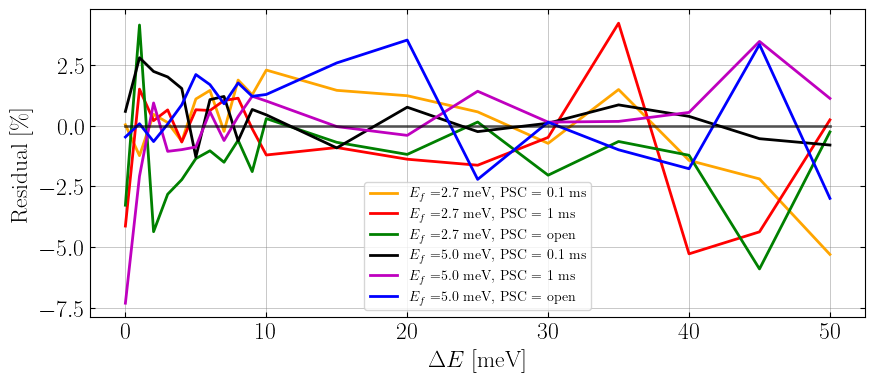

In [141]:
DivError_2p7_0p1ms = (data_FWHM[0,0,:]- ErrorProb_2p7_0p1ms)/ErrorProb_2p7_0p1ms*100
DivError_2p7_1ms = (data_FWHM[0,14,:] - ErrorProb_2p7_1ms)/ErrorProb_2p7_1ms*100
DivError_2p7_4ms = (data_FWHM[0,15,:] - ErrorProb_2p7_4ms)/ErrorProb_2p7_4ms*100

DivError_5p0_0p1ms = (data_FWHM[4,0,:] - ErrorProb_5p0_0p1ms)/ErrorProb_5p0_0p1ms*100
DivError_5p0_1ms = (data_FWHM[4,14,:] - ErrorProb_5p0_1ms)/ErrorProb_5p0_1ms*100
DivError_5p0_4ms = (data_FWHM[4,15,:] - ErrorProb_5p0_4ms)/ErrorProb_5p0_4ms*100

print(data_FWHM[4,15,:])
print(ErrorProb_5p0_4ms)

plt.figure(figsize=(10,4))
plt.plot(Delta_E_range, DivError_2p7_0p1ms, '-',label='$E_f =$2.7 meV, PSC = 0.1 ms', color='orange')
plt.plot(Delta_E_range, DivError_2p7_1ms, '-', label='$E_f =$2.7 meV, PSC = 1 ms', color='r')
plt.plot(Delta_E_range, DivError_2p7_4ms, '-', label='$E_f =$2.7 meV, PSC = open', color='g')

plt.plot(Delta_E_range, DivError_5p0_0p1ms, '-', label='$E_f =$5.0 meV, PSC = 0.1 ms', color='black')
plt.plot(Delta_E_range, DivError_5p0_1ms, '-', label='$E_f =$5.0 meV, PSC = 1 ms', color='m')
plt.plot(Delta_E_range, DivError_5p0_4ms, '-', label='$E_f =$5.0 meV, PSC = open', color='b')

plt.xlabel('$\Delta E$ [meV]')
#ax[1,0].set_xlim(0,50)
plt.ylabel(r'Residual [\%]')
plt.legend(fontsize=10)

plt.grid(which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.6)
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)
plt.plot(Delta_E_range, np.zeros(len(Delta_E_range)),'k', alpha=0.6)

plt.savefig('./../../../Figures/PNG/Energy_residual.png', format='png', bbox_inches='tight', dpi=200)
plt.savefig('./../../../Figures/SVG/Energy_residual.svg', format='svg', bbox_inches='tight', dpi=200)

In [18]:
# Find all sigma_Ei
detector_float = np.array([2.7, 3.2, 3.8, 4.4, 5.0])

sigmaEi = []

for k in detector_float:
    for j in range(15):
        for i in Delta_E_range:
            num = sigma_Ei(i,k,j)
            sigmaEi.append(num)



In [19]:
sigmaEi = np.reshape(sigmaEi, (5,15,19))

cross_E = []

for i in range(len(sigmaEi)):
    for j in sigmaEi[i]:
        cross = np.where(j**2>Ef_mon_sigma[i]**2)
        min_cross = np.min(cross)
        cross_E.append(min_cross)

cross_E = np.flipud(np.reshape(cross_E,(5,-1)))
print(cross_E)

PSC_idx = np.arange(0,15)


[[12 10  7  5  4  3  3  2  2  1  1  1  0  0  0]
 [11  9  7  5  4  3  2  2  2  1  1  1  1  0  0]
 [11  8  6  4  3  3  2  2  2  1  1  1  1  0  0]
 [11  7  5  4  3  2  2  2  1  1  1  1  1  0  0]
 [ 9  6  4  3  2  2  2  1  1  1  1  1  0  0  0]]


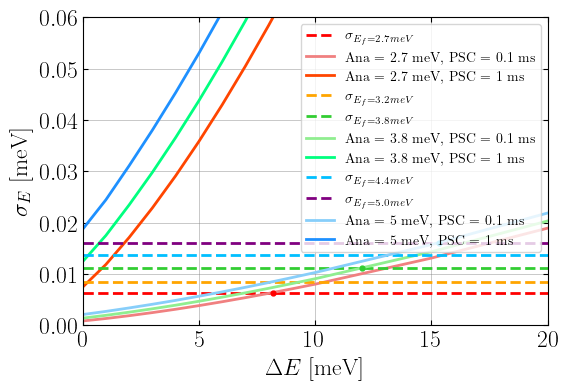

In [20]:
sigmaEf_2p7 = np.ones(19)*Ef_mon_sigma[0]
sigmaEf_3p2 = np.ones(19)*Ef_mon_sigma[1]
sigmaEf_3p8 = np.ones(19)*Ef_mon_sigma[2]
sigmaEf_4p4 = np.ones(19)*Ef_mon_sigma[3]
sigmaEf_5p0 = np.ones(19)*Ef_mon_sigma[4]

#print(sigmaEi[4,0,:])
#print(np.shape(sigmaEi))

x_cross_2p7 = np.zeros(15)
x_cross_3p2 = np.zeros(15)
x_cross_3p8 = np.zeros(15)
x_cross_4p4 = np.zeros(15)
x_cross_5p0 = np.zeros(15)

for j in range(15):
    cross_2p7 = fit_to_crossing_point(Delta_E_range, sigmaEf_2p7, Delta_E_range,sigmaEi[0,j,:],(7,0.02))
    if cross_2p7 is None:
        continue
    else:
        x_cross_2p7[j] += cross_2p7[0]

for j in range(15):
    cross_3p2 = fit_to_crossing_point(Delta_E_range, sigmaEf_3p2, Delta_E_range,sigmaEi[1,j,:],(7,0.02))
    if cross_3p2 is None:
        continue
    else:
        x_cross_3p2[j] += cross_3p2[0]

for j in range(15):
    cross_3p8 = fit_to_crossing_point(Delta_E_range, sigmaEf_3p8, Delta_E_range,sigmaEi[2,j,:],(7,0.02))
    if cross_3p8 is None:
        continue
    else:
        x_cross_3p8[j] += cross_3p8[0]

for j in range(15):
    cross_4p4 = fit_to_crossing_point(Delta_E_range, sigmaEf_4p4, Delta_E_range,sigmaEi[3,j,:],(7,0.02))
    if cross_4p4 is None:
        continue
    else:
        x_cross_4p4[j] += cross_4p4[0]

for j in range(15):
    cross_5p0 = fit_to_crossing_point( Delta_E_range,sigmaEi[4,j,:], Delta_E_range, sigmaEf_5p0, (7,0.02))
    if cross_5p0 is None:
        continue
    else:
        x_cross_5p0[j] += cross_5p0[0]

DeltaE_crossings = np.array([x_cross_2p7, x_cross_3p2, x_cross_3p8, x_cross_4p4, x_cross_5p0])

plt.figure(figsize=(6,4))
plt.plot(Delta_E_range,sigmaEf_2p7, 'r--', label='$\sigma_{E_f =2.7 meV}$')
plt.plot(Delta_E_range,sigmaEi[0,0,:], label='Ana = 2.7 meV, PSC = 0.1 ms', color='lightcoral')
plt.plot(x_cross_2p7[0], sigmaEf_2p7[0], '.', color='red')

plt.plot(Delta_E_range,sigmaEi[0,14,:], label='Ana = 2.7 meV, PSC = 1 ms', color='orangered')
plt.plot(x_cross_2p7[14], sigmaEf_2p7[0], '.', color='red')


plt.plot(Delta_E_range,sigmaEf_3p2, '--', color='orange', label='$\sigma_{E_f =3.2 meV}$')



plt.plot(Delta_E_range,sigmaEf_3p8, '--',color='limegreen', label='$\sigma_{E_f =3.8 meV}$')
plt.plot(Delta_E_range,sigmaEi[2,0,:], label='Ana = 3.8 meV, PSC = 0.1 ms', color='lightgreen')
plt.plot(x_cross_3p8[0], sigmaEf_3p8[0], '.', color='limegreen')

plt.plot(Delta_E_range,sigmaEi[2,14,:], label='Ana = 3.8 meV, PSC = 1 ms', color='springgreen')
plt.plot(x_cross_3p8[14], sigmaEf_3p8[0], '.', color='limegreen')


plt.plot(Delta_E_range,sigmaEf_4p4, '--', color='deepskyblue', label='$\sigma_{E_f =4.4 meV}$')



plt.plot(Delta_E_range,sigmaEf_5p0, '--', color='purple', label='$\sigma_{E_f =5.0 meV}$')
plt.plot(Delta_E_range,sigmaEi[4,0,:], label='Ana = 5 meV, PSC = 0.1 ms', color='lightskyblue')
plt.plot(x_cross_5p0[0], sigmaEf_5p0[0], '.', color='deepskyblue')

plt.plot(Delta_E_range,sigmaEi[4,14,:], label='Ana = 5 meV, PSC = 1 ms', color='dodgerblue')
plt.plot(x_cross_5p0[14], sigmaEf_5p0[0], '.', color='deepskyblue')

plt.grid(which='major', linestyle='-', linewidth=0.5, color='gray', alpha=0.6)
plt.grid(which='minor', linestyle=':', linewidth=0.5, color='gray', alpha=0.5)
plt.xlabel('$\Delta E$ [meV]')
plt.ylabel('$\sigma_{E}$ [meV]')
plt.ylim(0,0.06)
plt.xlim(0,20)
plt.legend(fontsize=10)
#plt.yscale('log')
#plt.savefig('theoretical_energy_contributions.png', format='png', bbox_inches='tight')

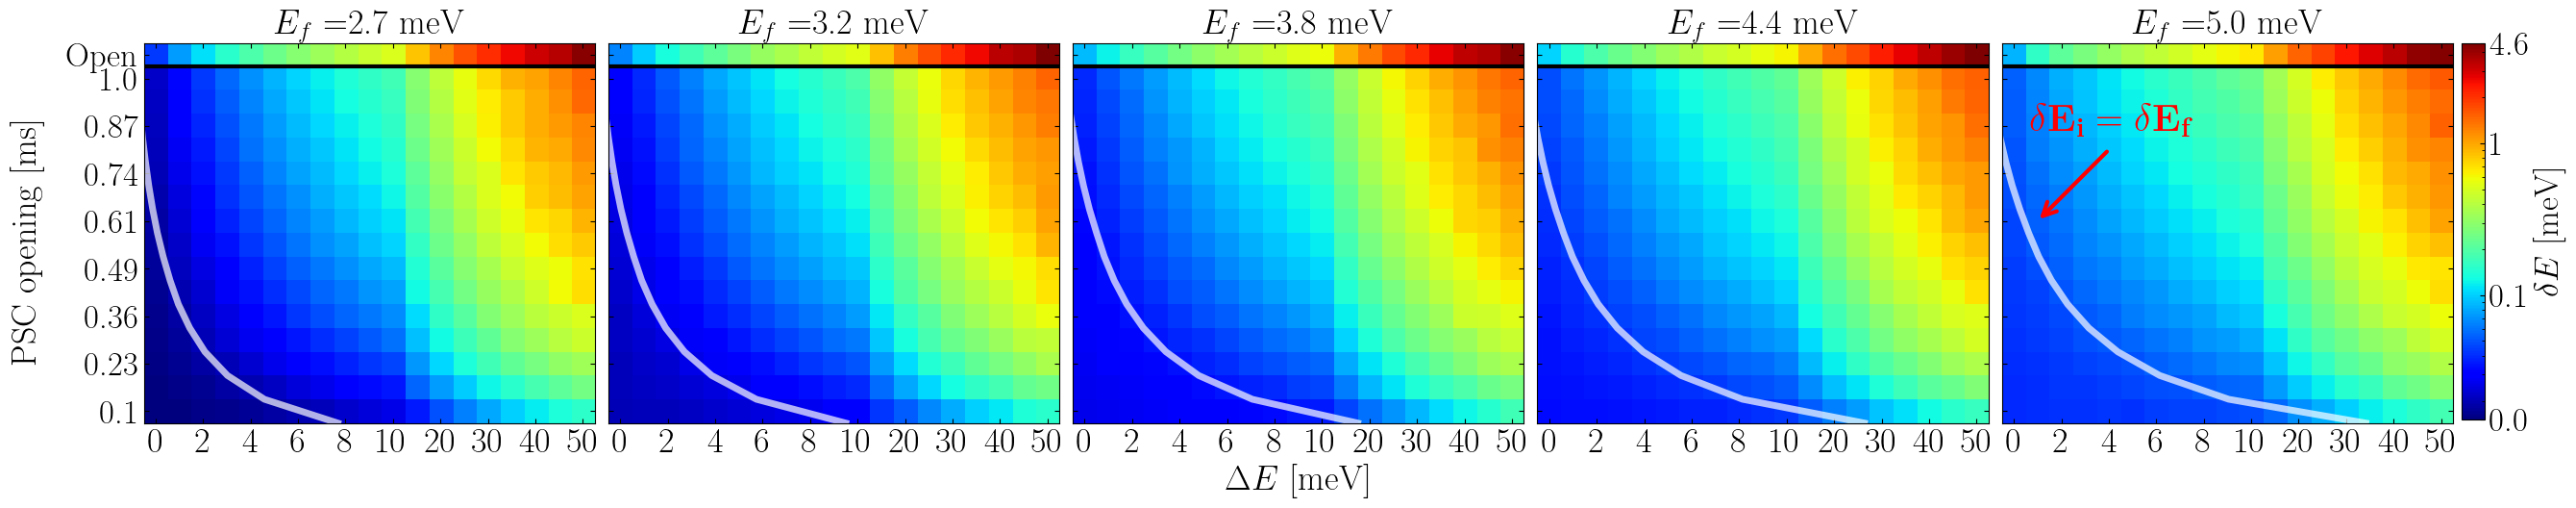

In [21]:
mpl.rcParams['font.size']        = 25 # standard er 45
n = 5
max_width = 5 ##images per row
height, width = n//max_width +1, max_width
fig, axs = plt.subplots(height, width, figsize=(31,18), sharey=True)
fig.subplots_adjust(wspace=0.03)
max_E = np.max(data_FWHM)
min_E = np.min(data_FWHM)

PSC_labels = np.array([0.1, 0.23, 0.36, 0.49, 0.61, 0.74,0.87, 1.0, 'Open'])
Delta_E_labels = np.array([0, 2, 4, 6, 8, 10, 20, 30, 40, 50])


for i in range(len(detector_float)):
    #ax.set_ylabel('PSC opening [ms]')
    ax = axs.flat[i]
    im = ax.imshow(np.flipud(data_FWHM[i]), norm=colors.LogNorm(vmin=min_E, vmax=max_E), cmap='jet') # norm=colors.LogNorm(vmin=min_E, vmax=max_E)
    if i == 2:
        ax.set_xlabel('$\Delta E$ [meV]', fontsize=26)
    ax.set_yticks([0, 1, 3, 5, 7, 9, 11, 13, 15])
    ax.set_yticklabels(np.flip(PSC_labels))
    ax.plot(DeltaE_crossings[i]-0.5, np.flipud(PSC_idx)+1.5, '-', color='white', linewidth=5, alpha=0.7)
    #ax.legend(loc="upper right")
    ax.set_xlim(-0.5,18.5)
    ax.set_title('$E_f$ ='+str(detector_float[i])+' meV', fontsize = 26)
    ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
    ax.set_xticklabels(Delta_E_labels, fontsize=26)
    ax.plot(np.array([-0.5,19]), np.array([0.5,0.5]), color='k', linewidth=3)
cax = ax.inset_axes([1.02, 0.01, 0.05, 0.99])
cbar=fig.colorbar(im, label=r'$\delta E$ [meV]', ax=axs[1, 2], cax=cax, ticks=[min_E, 0.1, 1, max_E])
cbar.ax.set_yticklabels([np.round(min_E,1),  0.1, 1, np.round(max_E,1)])
#cbar.ax.tick_params(labelsize=22)
ax.annotate(
    text='',
    xy=(1, 7),    # starting point of the arrow
    xytext=(4, 4),  # ending point of the arrow
    arrowprops=dict(arrowstyle='->', color='red', linewidth=3),
)

fig.text(0.785, 0.77, r'$\mathbf{\delta E_i = \delta E_f}$', color='red', ha='center', va='center', fontsize=29)

fig.text(0.08, 0.7, 'PSC opening [ms]', va='center', rotation='vertical', fontsize=26)

## access each axes object via axs.flat
for ax in axs.flat:
    ## check if something was plotted 
    if not bool(ax.has_data()):
        fig.delaxes(ax) ## delete if nothing is plotted in the axes obj

#fig.savefig('Inelastic_Energy_resolution_Article_limits.png', format='png', bbox_inches='tight', dpi=300)
#fig.savefig('Inelastic_Energy_resolution_Article_limits.svg', format='svg', bbox_inches='tight', dpi=300)